In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
housing = fetch_california_housing(as_frame=True)

# Convert to a DataFrame
df = housing.frame

# Display the first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


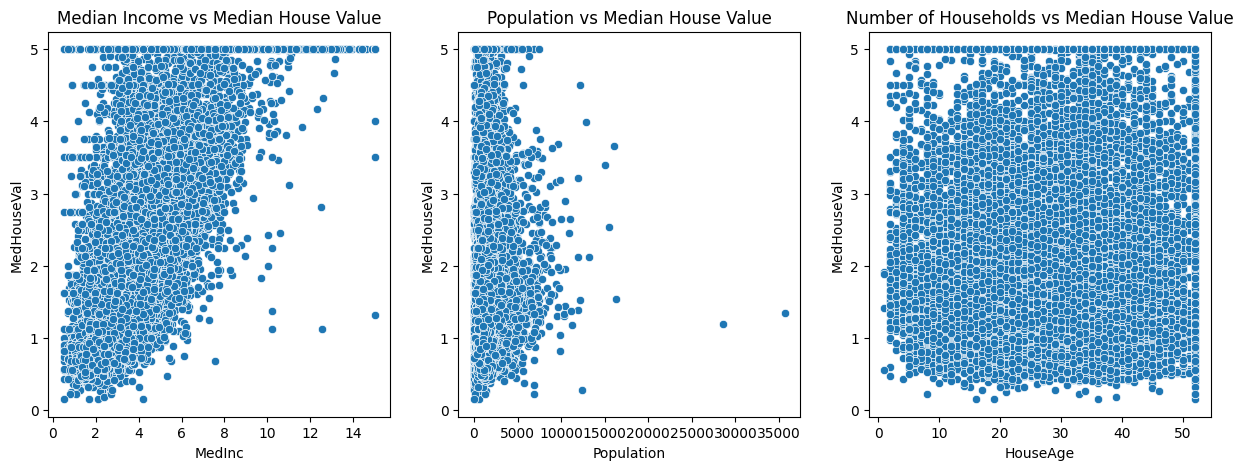

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up figure size
plt.figure(figsize=(15, 5))

# Median Income vs Median House Value
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])
plt.title("Median Income vs Median House Value")

# Population vs Median House Value
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['Population'], y=df['MedHouseVal'])
plt.title("Population vs Median House Value")

# Households vs Median House Value
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['HouseAge'], y=df['MedHouseVal'])
plt.title("Number of HouseAge vs Median House Value")

plt.show()


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [7]:
def train_and_evaluate_model(X, y, feature_name):
    # Reshape X (since it’s a single feature)
    X = X.values.reshape(-1, 1)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X)

    # Model parameters
    intercept = model.intercept_
    slope = model.coef_[0]

    # Evaluation metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    # Print results
    print(f"Model: {feature_name} vs. Median House Value")
    print(f"Intercept: {intercept:.2f}, Slope: {slope:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print("-" * 50)

    # Plot regression line
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X.flatten(), y=y, alpha=0.5, label="Data")
    plt.plot(X, y_pred, color="red", label=f"Regression Line")
    plt.xlabel(feature_name)
    plt.ylabel("Median House Value")
    plt.title(f"Linear Regression: {feature_name} vs. Median House Value")
    plt.legend()
    plt.show()

    return intercept, slope, mse, mae


Model: Median Income vs. Median House Value
Intercept: 0.45, Slope: 0.42
Mean Squared Error: 0.70
Mean Absolute Error: 0.63
--------------------------------------------------


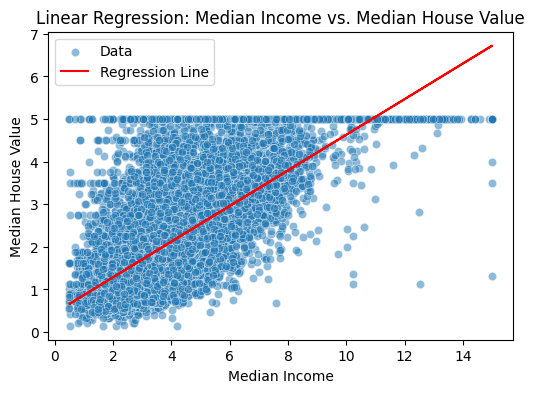

Model: Population vs. Median House Value
Intercept: 2.10, Slope: -0.00
Mean Squared Error: 1.33
Mean Absolute Error: 0.91
--------------------------------------------------


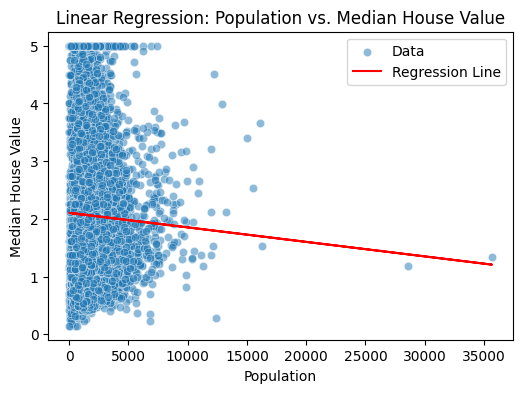

Model: Number of Households vs. Median House Value
Intercept: 1.79, Slope: 0.01
Mean Squared Error: 1.32
Mean Absolute Error: 0.91
--------------------------------------------------


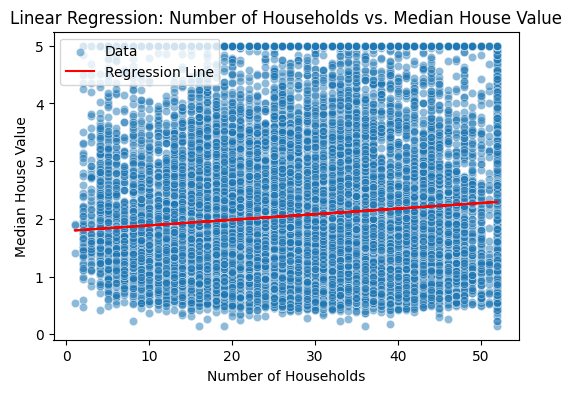

In [9]:
y = df["MedHouseVal"]  # Target variable

# Model 1: Median Income vs. Median House Value
intercept_1, slope_1, mse_1, mae_1 = train_and_evaluate_model(df["MedInc"], y, "Median Income")

# Model 2: Population vs. Median House Value
intercept_2, slope_2, mse_2, mae_2 = train_and_evaluate_model(df["Population"], y, "Population")

# Model 3: Households vs. Median House Value
intercept_3, slope_3, mse_3, mae_3 = train_and_evaluate_model(df["HouseAge"], y, "Number of Households")


In [14]:

# Creating the summary DataFrame
summary_df = pd.DataFrame({
    "Feature": ["Median Income", "Population", "Number of Households"],
    "Intercept": [intercept_1, intercept_2, intercept_3],
    "Slope": [slope_1, slope_2, slope_3],
    "MSE": [mse_1, mse_2, mse_3],
    "MAE": [mae_1, mae_2, mae_3]
})
summary_df



,Feature,Intercept,Slope,MSE,MAE
0,Median Income,0.450856,0.417938,0.701131,0.626259
1,Population,2.104363,-0.000025,1.330741,0.911538
2,Number of Households,1.791199,0.009684,1.316695,0.906205
